<a href="https://colab.research.google.com/github/Diksha161192/HacbkBio_SCS_Stage_Two/blob/main/HackBio_SCS_Stage_Two_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.5 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=50e710632d

In [3]:
import scanpy as sc
import anndata as ad



In [4]:
bone_marrow_adata = sc.read("/content/bone_marrow.h5ad")

In [5]:
!ls -lh /content/

total 339M
-rw-r--r-- 1 root root 339M Jan 17 18:40 bone_marrow.h5ad
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


In [6]:
print(bone_marrow_adata)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [7]:
# the dimensions of our dataset
bone_marrow_adata.shape

(14783, 17374)

In [8]:
bone_marrow_adata.obs

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep2,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,uszxekbWfs
Guo-TTTGTCATCAGAGACG-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,Other T,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,>`DyS!f$&t
Guo-TTTGTCATCAGATAAG-4,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep2,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,MC!9Ap710Z


In [9]:
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [10]:
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [11]:
bone_marrow_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()

In [13]:
bone_marrow_adata.var['MT'] = bone_marrow_adata.var['feature_name'].str.startswith("MT-")
bone_marrow_adata.var['RIBO'] = (
    bone_marrow_adata.var['feature_name'].str.startswith("RPS") |
    bone_marrow_adata.var['feature_name'].str.startswith("RPL")
)
bone_marrow_adata.var['HB'] = bone_marrow_adata.var['feature_name'].str.contains(r"^HB[^(P)]", regex=True, na=False)

In [14]:
mt_genes = bone_marrow_adata.var[bone_marrow_adata.var['MT']]
mt_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
ENSG00000228253,2270,False,MT-ATP8,NCBITaxon:9606,gene,207,protein_coding,True,False,False
ENSG00000198899,15626,False,MT-ATP6,NCBITaxon:9606,gene,681,protein_coding,True,False,False
ENSG00000198763,15561,False,MT-ND2,NCBITaxon:9606,gene,1042,protein_coding,True,False,False
ENSG00000198886,15656,False,MT-ND4,NCBITaxon:9606,gene,1378,protein_coding,True,False,False
ENSG00000198804,15656,False,MT-CO1,NCBITaxon:9606,gene,1542,protein_coding,True,False,False
ENSG00000198695,4611,False,MT-ND6,NCBITaxon:9606,gene,525,protein_coding,True,False,False
ENSG00000212907,6575,False,MT-ND4L,NCBITaxon:9606,gene,297,protein_coding,True,False,False
ENSG00000198888,14520,False,MT-ND1,NCBITaxon:9606,gene,956,protein_coding,True,False,False
ENSG00000198712,15669,False,MT-CO2,NCBITaxon:9606,gene,684,protein_coding,True,False,False
ENSG00000198727,15393,False,MT-CYB,NCBITaxon:9606,gene,1141,protein_coding,True,False,False


In [65]:
print("First 5 rows of 'pct_counts_MT':")
print(bone_marrow_adata.obs['pct_counts_MT'].head())

print("\nDescriptive statistics for 'pct_counts_MT':")
print(bone_marrow_adata.obs['pct_counts_MT'].describe())

First 5 rows of 'pct_counts_MT':
index
Guo-AAACCTGAGAGCTTCT-2    1.154665
Guo-AAACCTGCACACCGCA-4    1.027669
Guo-AAACCTGCACGACTCG-6    1.607996
Guo-AAACCTGCATCCAACA-3    1.135831
Guo-AAACCTGGTTCAGGCC-4    0.936615
Name: pct_counts_MT, dtype: float32

Descriptive statistics for 'pct_counts_MT':
count    6322.000000
mean        1.170105
std         0.385855
min         0.000000
25%         0.955453
50%         1.139699
75%         1.294902
max         4.927056
Name: pct_counts_MT, dtype: float64


In [15]:
hb_genes = bone_marrow_adata.var[bone_marrow_adata.var['HB']]
hb_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
ENSG00000086506,73,False,HBQ1,NCBITaxon:9606,gene,528,protein_coding,False,False,True
ENSG00000112339,1266,False,HBS1L,NCBITaxon:9606,gene,1290,protein_coding,False,False,True
ENSG00000196565,95,False,HBG2,NCBITaxon:9606,gene,586,protein_coding,False,False,True
ENSG00000113070,94,False,HBEGF,NCBITaxon:9606,gene,1230,protein_coding,False,False,True
ENSG00000223609,108,False,HBD,NCBITaxon:9606,gene,566,protein_coding,False,False,True
ENSG00000188536,3172,False,HBA2,NCBITaxon:9606,gene,544,protein_coding,False,False,True
ENSG00000244734,4679,False,HBB,NCBITaxon:9606,gene,618,protein_coding,False,False,True
ENSG00000206172,2302,False,HBA1,NCBITaxon:9606,gene,540,protein_coding,False,False,True
ENSG00000206177,21,False,HBM,NCBITaxon:9606,gene,592,protein_coding,False,False,True
ENSG00000213931,6,False,HBE1,NCBITaxon:9606,gene,913,protein_coding,False,False,True


In [66]:
print("First 5 rows of 'pct_counts_MT':")
print(bone_marrow_adata.obs['pct_counts_HB'].head())

print("\nDescriptive statistics for 'pct_counts_HB':")
print(bone_marrow_adata.obs['pct_counts_HB'].describe())

First 5 rows of 'pct_counts_MT':
index
Guo-AAACCTGAGAGCTTCT-2    0.000000
Guo-AAACCTGCACACCGCA-4    0.235598
Guo-AAACCTGCACGACTCG-6    0.184364
Guo-AAACCTGCATCCAACA-3    0.000000
Guo-AAACCTGGTTCAGGCC-4    0.113215
Name: pct_counts_HB, dtype: float32

Descriptive statistics for 'pct_counts_HB':
count    6322.000000
mean        0.053581
std         0.081073
min         0.000000
25%         0.000000
50%         0.000000
75%         0.089949
max         0.972649
Name: pct_counts_HB, dtype: float64


In [16]:
ribo_genes = bone_marrow_adata.var[bone_marrow_adata.var['RIBO']]
ribo_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
ENSG00000197958,14752,False,RPL12,NCBITaxon:9606,gene,634,protein_coding,False,True,False
ENSG00000117676,2019,False,RPS6KA1,NCBITaxon:9606,gene,586,protein_coding,False,True,False
ENSG00000122026,15386,False,RPL21,NCBITaxon:9606,gene,628,protein_coding,False,True,False
ENSG00000174444,13230,False,RPL4,NCBITaxon:9606,gene,671,protein_coding,False,True,False
ENSG00000089157,13079,False,RPLP0,NCBITaxon:9606,gene,792,protein_coding,False,True,False
...,...,...,...,...,...,...,...,...,...,...
ENSG00000171863,14465,False,RPS7,NCBITaxon:9606,gene,707,protein_coding,False,True,False
ENSG00000147403,15417,False,RPL10,NCBITaxon:9606,gene,775,protein_coding,False,True,False
ENSG00000071242,82,False,RPS6KA2,NCBITaxon:9606,gene,817,protein_coding,False,True,False
ENSG00000114391,13854,False,RPL24,NCBITaxon:9606,gene,812,protein_coding,False,True,False


In [67]:
print("First 5 rows of 'pct_counts_RIBO':")
print(bone_marrow_adata.obs['pct_counts_RIBO'].head())

print("\nDescriptive statistics for 'pct_counts_RIBO':")
print(bone_marrow_adata.obs['pct_counts_RIBO'].describe())

First 5 rows of 'pct_counts_RIBO':
index
Guo-AAACCTGAGAGCTTCT-2    7.343850
Guo-AAACCTGCACACCGCA-4    9.075722
Guo-AAACCTGCACGACTCG-6    0.940382
Guo-AAACCTGCATCCAACA-3    9.577539
Guo-AAACCTGGTTCAGGCC-4    7.550290
Name: pct_counts_RIBO, dtype: float32

Descriptive statistics for 'pct_counts_RIBO':
count    6322.000000
mean        7.820879
std         1.641264
min         0.940382
25%         6.726698
50%         8.190546
75%         9.157956
max         9.998349
Name: pct_counts_RIBO, dtype: float64


In [21]:
#calculate the qc metrics

sc.pp.calculate_qc_metrics(
    bone_marrow_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [22]:
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,138.356339,4.937034,1.154665,879.968079,6.781022,7.343850,0.000000,0.000000,0.000000
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,113.859787,4.743712,1.350507,914.212402,6.819156,10.843602,0.000000,0.000000,0.000000
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,125.068520,4.836825,1.543431,952.813843,6.860468,11.758374,18.301193,2.960167,0.225849
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,103.474380,4.648942,1.182754,924.013672,6.829809,10.561848,0.000000,0.000000,0.000000
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,138.531082,4.938287,2.870118,850.272156,6.746732,17.616129,0.000000,0.000000,0.000000


In [23]:
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


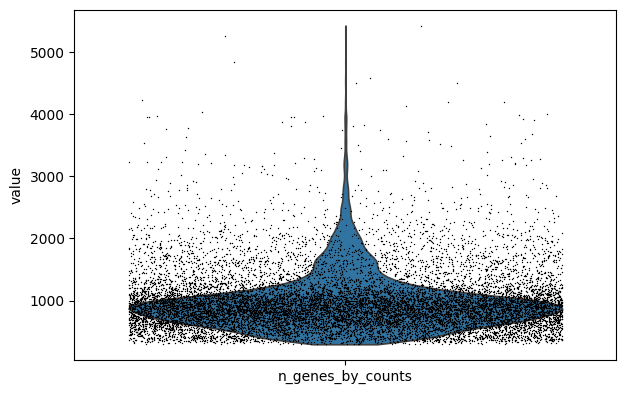

In [24]:
sc.pl.violin(
    bone_marrow_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

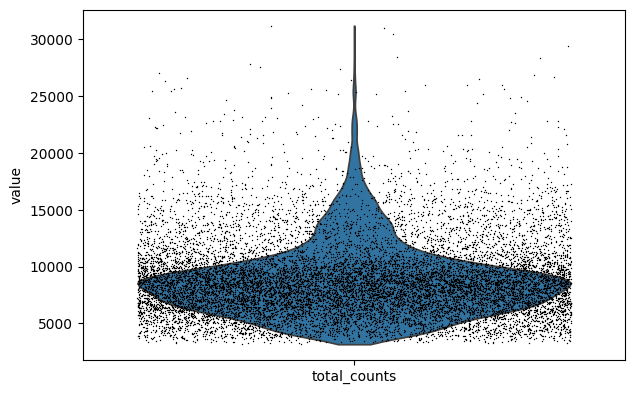

In [25]:
sc.pl.violin(
    bone_marrow_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

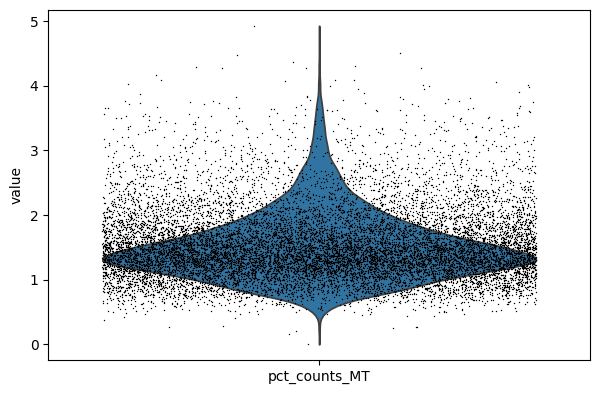

In [26]:
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)

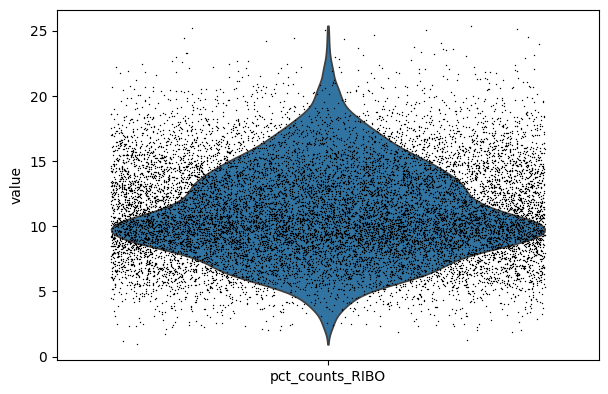

In [27]:
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

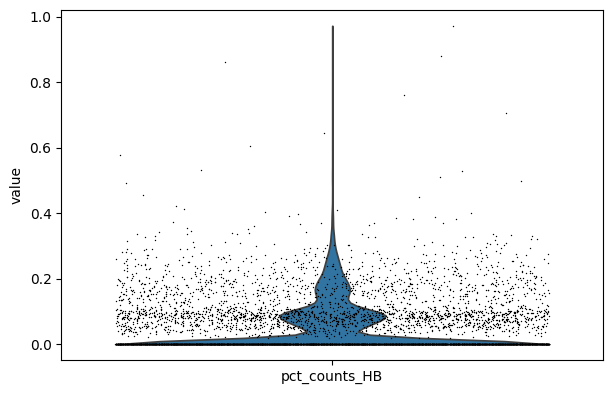

In [68]:
sc.pl.violin(
    bone_marrow_adata,
    ["pct_counts_HB"],
    jitter=0.4,
    multi_panel=False,
)

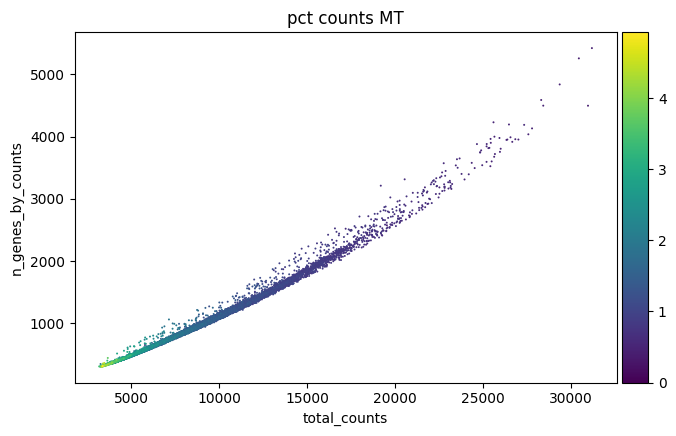

In [32]:
sc.pl.scatter(bone_marrow_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

In [75]:
sc.pp.scrublet(bone_marrow_adata)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scrublet/__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


In [76]:
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()

In [77]:
sc.pp.normalize_total(bone_marrow_adata)

In [78]:
sc.pp.log1p(bone_marrow_adata)

In [82]:
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=1000)

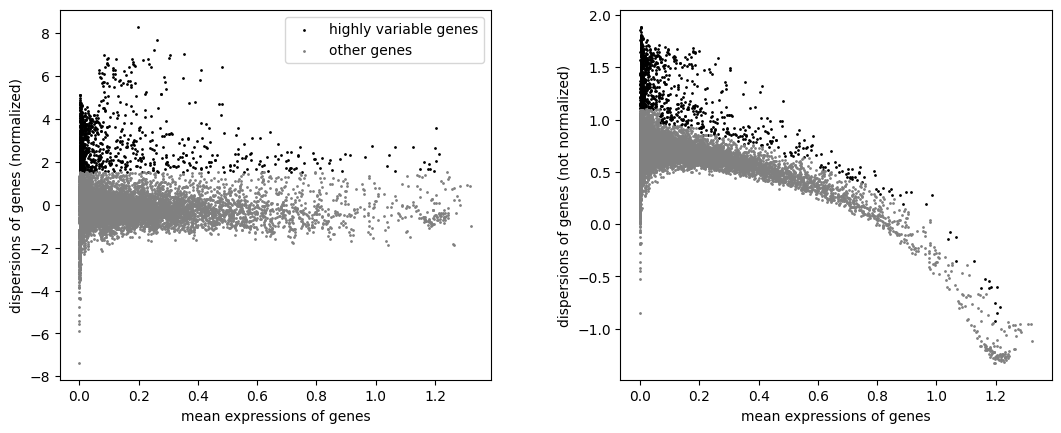

In [83]:
sc.pl.highly_variable_genes(bone_marrow_adata )

In [84]:
sc.tl.pca(bone_marrow_adata)

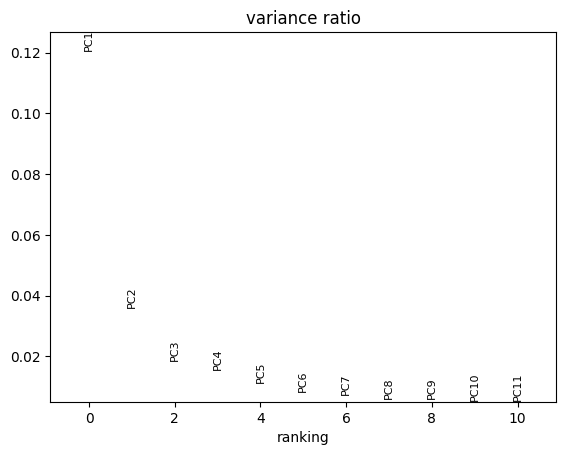

In [85]:
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)

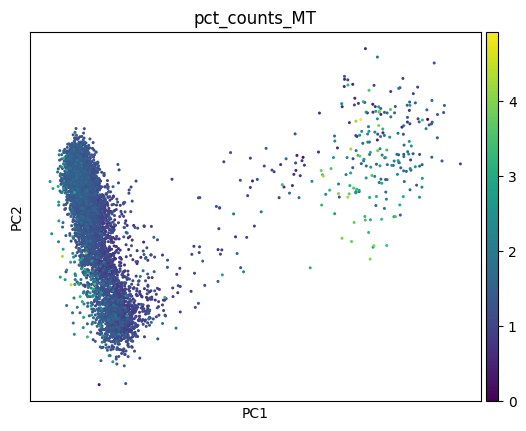

In [86]:
sc.pl.pca(
    bone_marrow_adata,
    color=["pct_counts_MT"]
)

In [87]:
sc.pp.neighbors(bone_marrow_adata)

In [88]:
sc.tl.umap(bone_marrow_adata)

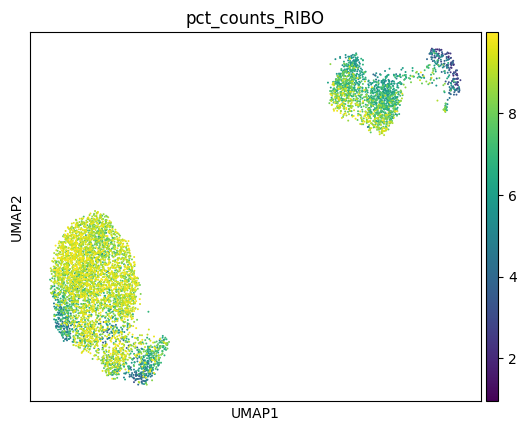

In [89]:

sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

In [92]:
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2)

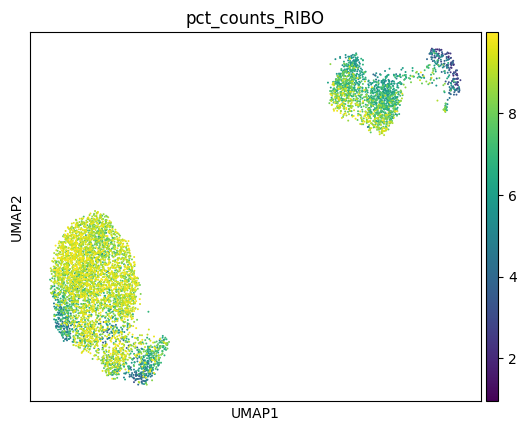

In [93]:
sc.pl.umap(
    bone_marrow_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

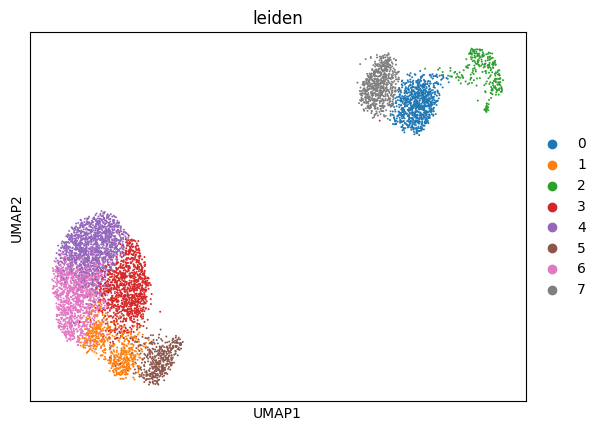

In [94]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    size=8,
)

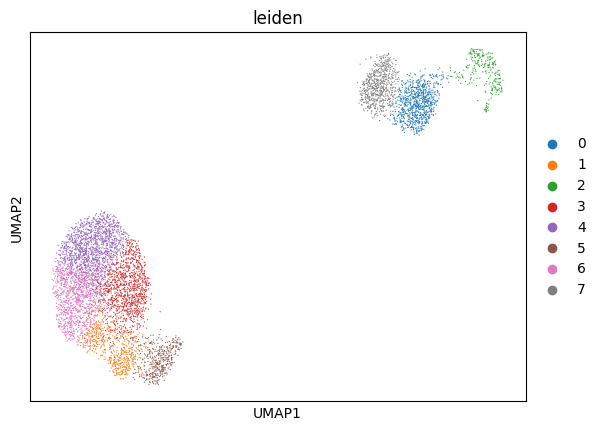

In [95]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

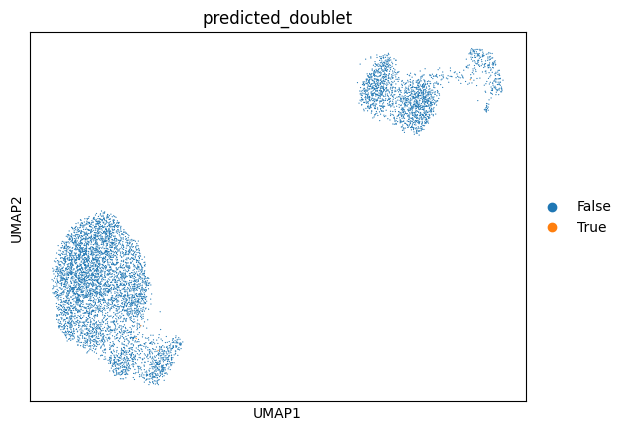

In [96]:
sc.pl.umap(
    bone_marrow_adata,
    color=[ "predicted_doublet"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

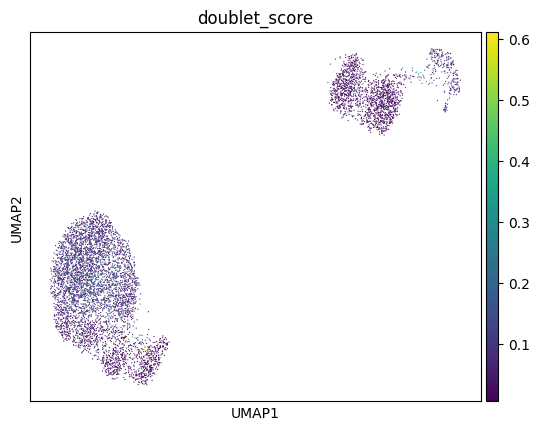

In [97]:
sc.pl.umap(
    bone_marrow_adata,
    color=[ "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [98]:
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

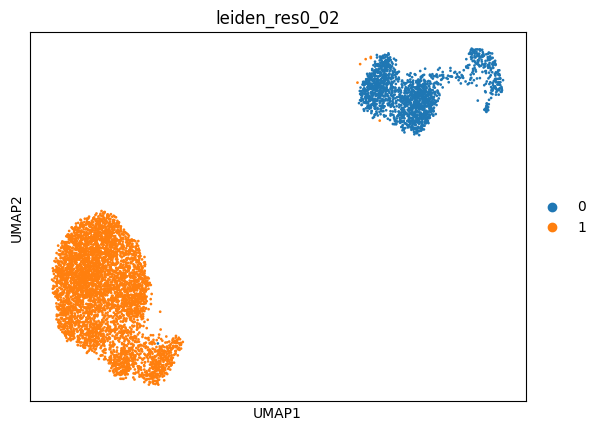

In [99]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

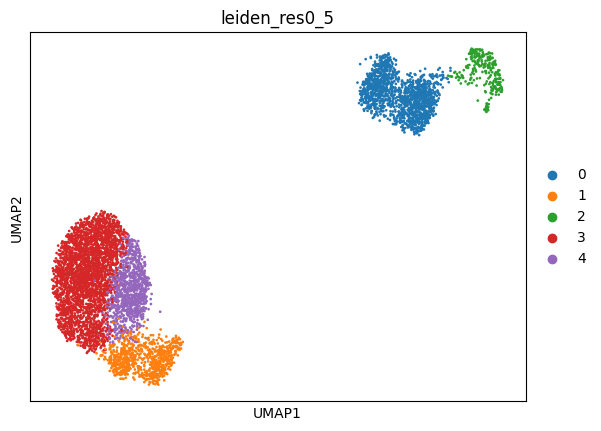

In [100]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

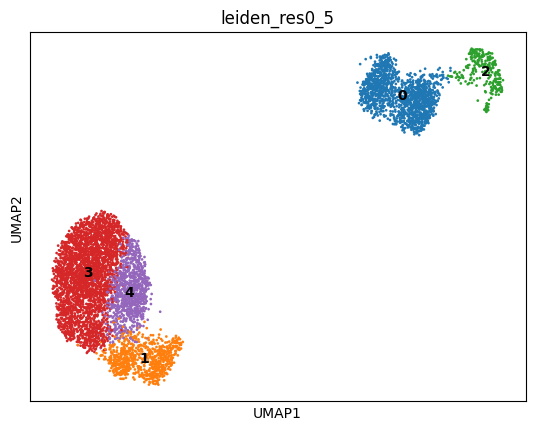

In [101]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

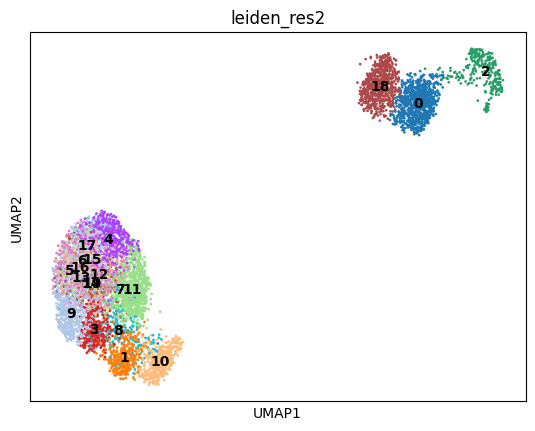

In [102]:
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

In [103]:
!wget wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'

--2026-01-17 20:02:16--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2026-01-17 20:02:16--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [       <=>     

In [104]:
import pandas as pd

ensembl_var = pd.read_csv('/content/result.txt', header = None)

ensembl_var.columns = ['ensembl_gene_id', 'gene_name']

ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [105]:

import decoupler as dc

In [106]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
#markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [107]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Hepatocytes,ENSG00000148584
2,Bergmann glia,ENSG00000175899
4,Mast cells,ENSG00000128274
6,Interneurons,ENSG00000115977
7,Neurons,ENSG00000115977


In [111]:
dc.mt.ulm(data=bone_marrow_adata,
          net=markers,
          tmin = 3)

In [112]:
score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 6322 × 163
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'MT', 'RIBO', 'HB', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_to

In [113]:
bone_marrow_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocyte progenitor cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,Astrocytes,B cells,...,Tanycytes,Taste receptor cells,Thymocytes,Transient cells,Trigeminal neurons,Trophoblast cells,Tuft cells,Undefined placental cells,Urothelial cells,Vascular smooth muscle cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.815735,-0.985719,0.496687,-0.594280,-1.029582,0.733499,5.037355,-0.223274,0.127135,1.054373,...,0.504044,0.306165,-0.553575,0.517735,-0.933701,-0.353929,3.131117,-0.786233,-0.786233,-0.514646
Guo-AAACCTGCACACCGCA-4,-1.075227,-0.920655,-1.004604,-0.555055,1.247228,0.928249,-0.486510,-0.059652,1.501899,8.134806,...,-0.785064,0.442430,2.091456,1.639440,0.636701,-0.216692,1.151570,-0.734337,-0.734337,-0.480677
Guo-AAACCTGCACGACTCG-6,-0.678736,-0.581165,-0.109257,-0.350383,-0.607025,0.830747,0.457252,-0.678736,-0.104956,-1.205643,...,3.667480,-0.525653,0.472728,-0.722612,-0.944137,-0.722612,0.378633,-0.463554,-0.463554,-0.303431
Guo-AAACCTGCATCCAACA-3,-1.006486,-0.861797,-0.292972,-0.519571,-0.900145,1.088672,-0.284666,1.088672,0.452233,2.697384,...,-0.734875,-0.779477,2.373632,0.896613,-1.400067,-1.071552,0.478416,-0.687391,-0.687391,-0.449948
Guo-AAACCTGGTTCAGGCC-4,0.491648,-0.051937,-0.713352,1.037906,-0.142454,-1.244215,-0.735889,-0.376259,-0.241873,0.510646,...,-0.908443,-0.963580,0.728561,0.306013,-1.106229,0.306013,0.667230,-0.849744,-0.849744,-0.556217


In [114]:
bone_marrow_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocyte progenitor cells', 'Adipocytes',
       'Adrenergic neurons', 'Airway goblet cells', 'Alpha cells',
       'Alveolar macrophages', 'Anterior pituitary gland cells', 'Astrocytes',
       'B cells',
       ...
       'Tanycytes', 'Taste receptor cells', 'Thymocytes', 'Transient cells',
       'Trigeminal neurons', 'Trophoblast cells', 'Tuft cells',
       'Undefined placental cells', 'Urothelial cells',
       'Vascular smooth muscle cells'],
      dtype='object', length=163)

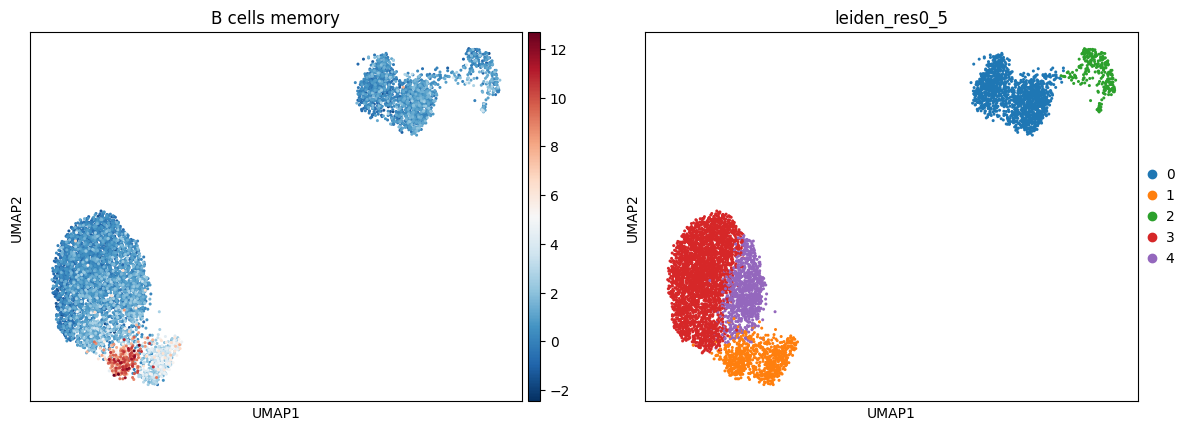

In [115]:
sc.pl.umap(score, color=["B cells memory", "leiden_res0_5"], cmap="RdBu_r")

In [116]:

import seaborn as sns

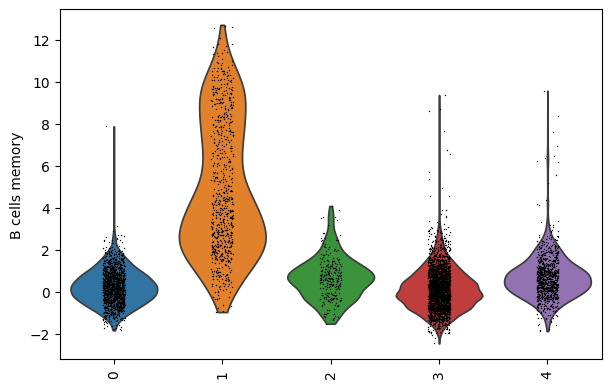

In [117]:
sc.pl.violin(score, keys=["B cells memory"], groupby="leiden_res0_5", rotation=90)

In [118]:
bone_marrow_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_5", reference="rest", method="t-test_overestim_var")
bone_marrow_adata_rank = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0]
bone_marrow_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Monocytes,181.877946,10.259006,0.0,0.0
1,0,rest,Dendritic cells,111.890667,5.231525,0.0,0.0
2,0,rest,Macrophages,105.728617,5.448906,0.0,0.0
3,0,rest,Neutrophils,104.116482,5.561614,0.0,0.0
4,0,rest,Kupffer cells,80.866461,3.055719,0.0,0.0


In [119]:
cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


/tmp/ipython-input-2640889597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [120]:
cluster_annotations

{'0': 'Monocytes',
 '1': 'B cells',
 '2': 'Platelets',
 '3': 'T cells',
 '4': 'NK cells'}

In [121]:
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_5'].map(cluster_annotations)


In [122]:
# Example of how to subset for multiple genes in the 'source' column
available_genes = set(bone_marrow_adata.var_names)

b_cell_markers = markers[markers['source'].isin(['B cells memory'])]['target']
b_cell_markers = b_cell_markers[b_cell_markers.isin(available_genes)]

nk_cell_markers = markers[markers['source'].isin(['Natural killer T cells'])]['target']
nk_cell_markers = nk_cell_markers[nk_cell_markers.isin(available_genes)]

t_cells_markers = markers[markers['source'].isin(['T cells'])]['target']
t_cells_markers = t_cells_markers[t_cells_markers.isin(available_genes)]


#display(b_cell_markers)

In [123]:
marker_genes_dict = {
    "B cells": b_cell_markers.head().tolist(),
    "NK cells": nk_cell_markers.head().tolist(),
    "T cells": t_cells_markers.head().tolist()
}

categories: Monocytes, B cells, Platelets, etc.
var_group_labels: B cells, NK cells, T cells


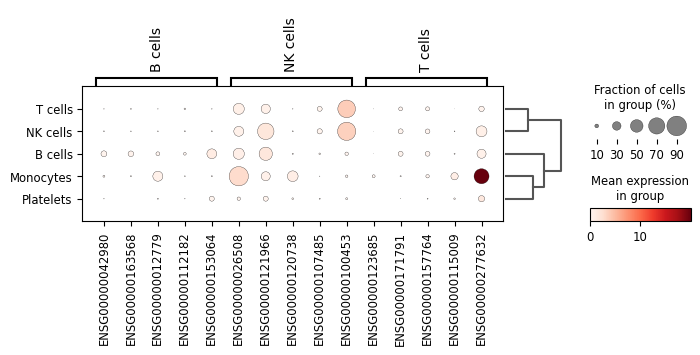

In [124]:
sc.pl.dotplot(bone_marrow_adata, marker_genes_dict, "cell_type", dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


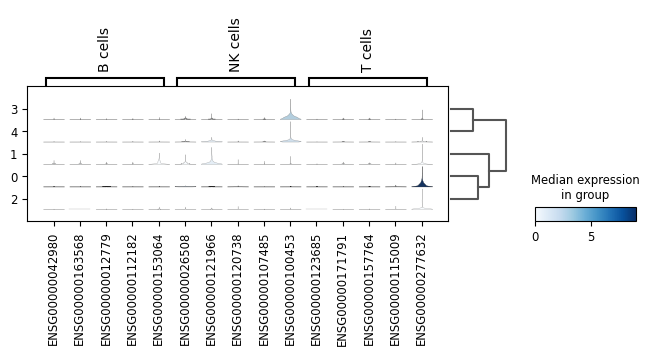

In [125]:
sc.pl.stacked_violin(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5",  dendrogram=True
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


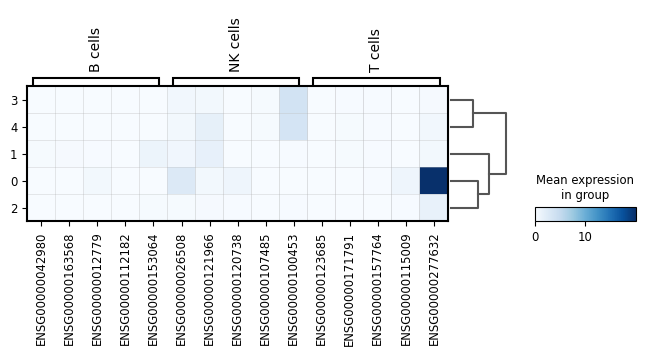

In [126]:
sc.pl.matrixplot(
    bone_marrow_adata,
    marker_genes_dict,
    "leiden_res0_5",
    dendrogram=True,
    cmap="Blues",
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, NK cells, T cells


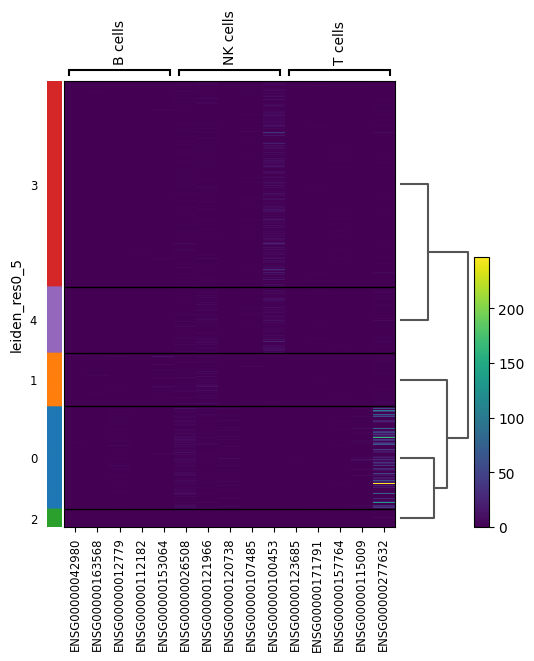

In [127]:
sc.pl.heatmap(
    bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5", cmap="viridis", dendrogram=True
)

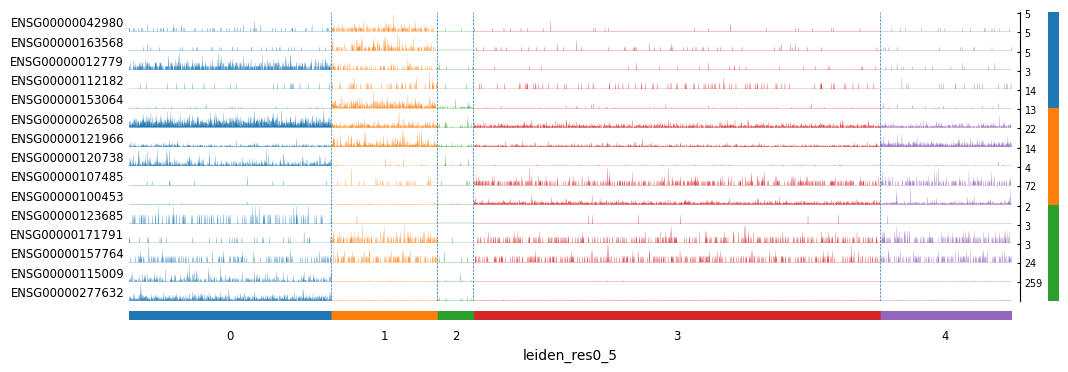

In [128]:
sc.pl.tracksplot(bone_marrow_adata, marker_genes_dict, groupby="leiden_res0_5", dendrogram=False)

# Task
Display the first 5 rows of the `pct_counts_MT` column from `bone_marrow_adata.obs` and print its descriptive statistics.

## Display pct_counts_MT

### Subtask:
Show the first 5 rows of the 'pct_counts_MT' column from `bone_marrow_adata.obs` and also print its descriptive statistics (mean, std, min, max, etc.) to get an overview of the mitochondrial gene percentage distribution across cells.


**Reasoning**:
To fulfill the subtask, I need to display the first 5 rows of the 'pct_counts_MT' column and then its descriptive statistics. I will use the `.head()` method for the first part and the `.describe()` method for the second part, both applied to the 'pct_counts_MT' column in `bone_marrow_adata.obs`.

